In [1]:
import json
with open('/lustre/scratch/shared-folders/world-project/datasets/guangyi_data/panda_ori/caption/gemini_caption_data_v1.json') as f:
    dataset = json.load(f)

In [3]:
dataset['BdcL0xg9vso_0']

{'videoID': 'BdcL0xg9vso',
 'clip_id': 0,
 'timestamp': ['0:05:26.092', '0:05:34.100'],
 'cut_info': [19.878252484309623,
  9.077289957585045,
  6.217927635402139,
  3.447870997221674],
 'new_fps': 14.985,
 'stride': 2,
 'split_num': 3,
 'caption': 'A young man in a blue shirt is holding a cupcake in his hands.',
 'matching_score': 0.4599609375,
 'gemini': {'caption': ['The person in the blue shirt holds a white object in their hands and examines it. They open their mouth wide and look down at the object. The camera remains stationary throughout the video. \n',
   'The man speaks while gesturing with his hands. He points to his head and then at a dish in front of him. The camera remains still throughout the scene. \n',
   'The man in the blue shirt is talking while looking directly at the camera and gesturing with his right hand. He is holding a small white object that resembles a loaf of bread. The camera remains stationary throughout the frames. \n'],
  'failed_reason': '',
  'total'

In [18]:
from tqdm import tqdm
num_frames = [16,16+12,16+12+12]
info_dict= {
    'stride':[],
    'new_fps':[],
    'split_num':[],
    'length':[],
    'avg_length':[]
}

for key,value in tqdm(dataset.items(), total = len(dataset)):
    for ii in info_dict.keys():
        if 'length' not in ii:
            info_dict[ii].append(value[ii])
    length = num_frames[value['split_num']-1] / value['new_fps'] 
    info_dict['length'].append(round(length,2))
    info_dict['avg_length'].append(round(length/value['split_num'],2))

100%|███████████████████████████████████████████████████| 211368/211368 [00:00<00:00, 455539.41it/s]


In [17]:
info_dict['stride']

{'stride': [2],
 'new_fps': [14.985],
 'split_num': [3],
 'length': [2.67],
 'avg_length': [0.89]}

In [19]:
import matplotlib.pyplot as plt

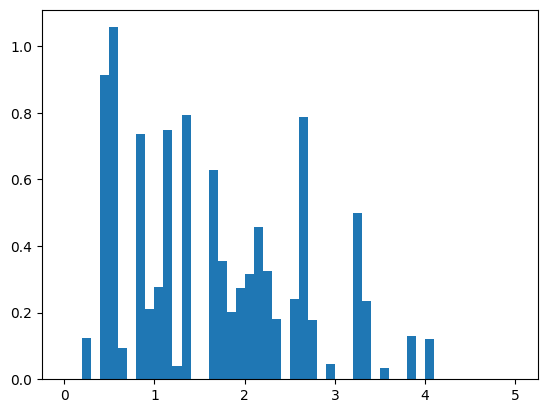

In [24]:
import numpy as np
plt.hist(np.array(info_dict['avg_length']),bins=50,density=True, range=(0,5))
plt.show()

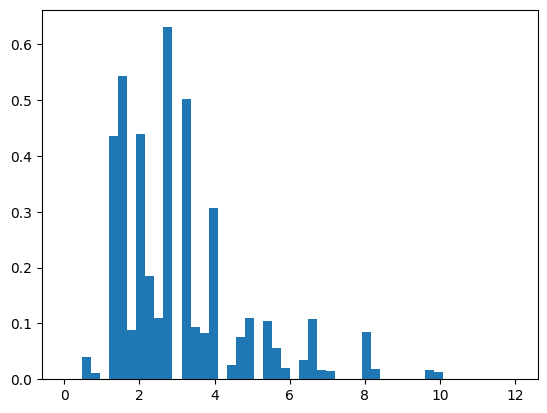

In [28]:
import numpy as np
plt.hist(np.array(info_dict['length']),bins=50,density=True, range=(0,12))
plt.show()

In [33]:
import os
import json
from tqdm import tqdm
# Define the base directory where the json files are located
base_dir = "/home/guangyi.liu/shared-folder/datasets/guangyi_data/scripts/panda70m/"

# Initialize a dictionary to hold the combined data
combined_dict = {}

# Function to recursively search for all files ending with 'captions.json' in a directory
def find_and_combine_json_files(directory):
    # Iterate through each item in the directory
    for item in tqdm(os.listdir(directory), ncols=90):
        item_path = os.path.join(directory, item)
        # Check if the item is a directory, if so, recursively search within it
        if os.path.isdir(item_path):
            find_and_combine_json_files(item_path)
        elif item_path.endswith('gpt_captions_v4.json'):
            # Found a json file, read and combine its content
            with open(item_path, 'r') as json_file:
                # Initialize an empty dictionary for this file
                file_dict = {}
                for line in json_file:
                    # Each line is a separate dict; merge it into file_dict
                    line_dict = json.loads(line)
                    file_dict.update(line_dict)
                # Add the combined dictionary of this file to the main dictionary
                combined_dict[item_path] = file_dict

# Start the process
find_and_combine_json_files(base_dir)
total_length = sum(len(value) for value in combined_dict.values())

print(total_length)


100%|██████████████████████████████████████████████████| 98/98 [00:00<00:00, 53871.79it/s]

100%|██████████████████████████████████████████████| 6158/6158 [00:00<00:00, 64411.89it/s]

100%|████████████████████████████████████████████| 12422/12422 [00:00<00:00, 65420.55it/s]

100%|█████████████████████████████████████████████| 14011/14011 [00:09<00:00, 1553.96it/s]

100%|█████████████████████████████████████████████████████| 18/18 [01:53<00:00,  6.32s/it]

250277


In [34]:
len(combined_dict)

6519

In [40]:
dataset_prev = {}
for json_file, json_info in combined_dict.items():
    dataset_prev.update(json_info)


In [42]:
num_frames = [16,16+12,16+12+12]
info_dict_prev= {
    'stride':[],
    'fps':[],
    'split_num':[],
    'length':[],
    'avg_length':[]
}

for key, value in tqdm(dataset_prev.items(),total=len(dataset_prev)):
    for ii in info_dict_prev.keys():
        if 'length' not in ii:
            info_dict_prev[ii].append(value[ii])
    length = num_frames[value['split_num']-1] / value['fps'] 
    info_dict_prev['length'].append(round(length,2))
    info_dict_prev['avg_length'].append(round(length/value['split_num'],2))

100%|███████████████████████████████████████████████████| 248695/248695 [00:00<00:00, 422329.02it/s]


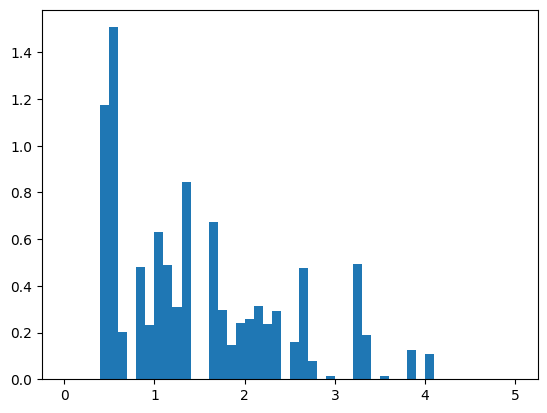

In [43]:
import numpy as np
plt.hist(np.array(info_dict_prev['avg_length']),bins=50,density=True, range=(0,5))
plt.show()

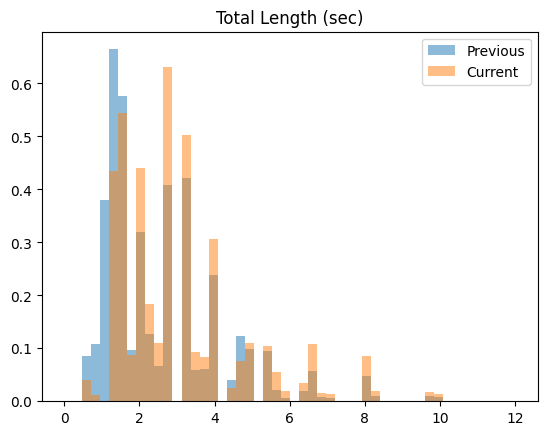

In [57]:
# 假设 info_dict_prev 和 info_dict 是两个包含 'length' 键的字典
data1 = np.array(info_dict_prev['length'])
data2 = np.array(info_dict['length'])

# 在同一个图中绘制两个直方图
plt.hist(data1, bins=50, density=True, range=(0, 12), alpha=0.5, label='Previous')
plt.hist(data2, bins=50, density=True, range=(0, 12), alpha=0.5, label='Current')

# 添加图例
plt.legend()
plt.title("Total Length (sec)")

# 显示图形
plt.show()

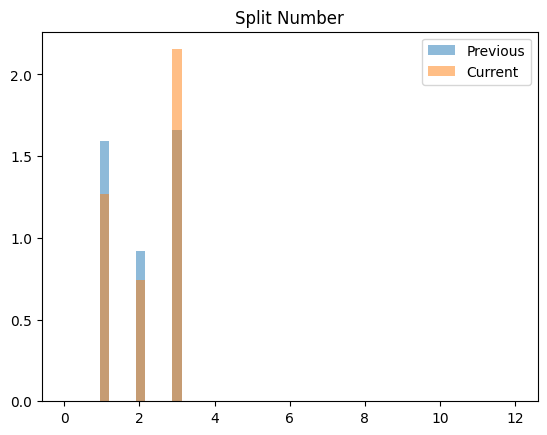

In [58]:
# 假设 info_dict_prev 和 info_dict 是两个包含 'length' 键的字典
data1 = np.array(info_dict_prev['split_num'])
data2 = np.array(info_dict['split_num'])

# 在同一个图中绘制两个直方图
plt.hist(data1, bins=50, density=True, range=(0, 12), alpha=0.5, label='Previous')
plt.hist(data2, bins=50, density=True, range=(0, 12), alpha=0.5, label='Current')

# 添加图例
plt.legend()
plt.title("Split Number")
# 显示图形
plt.show()

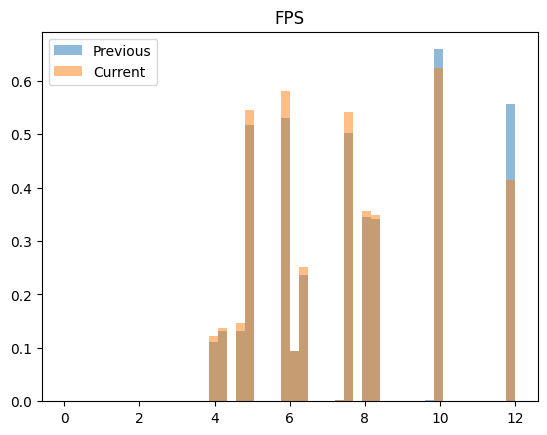

In [59]:
# 假设 info_dict_prev 和 info_dict 是两个包含 'length' 键的字典
data1 = np.array(info_dict_prev['fps'])
data2 = np.array(info_dict['new_fps'])

# 在同一个图中绘制两个直方图
plt.hist(data1, bins=50, density=True, range=(0, 12), alpha=0.5, label='Previous')
plt.hist(data2, bins=50, density=True, range=(0, 12), alpha=0.5, label='Current')

# 添加图例
plt.legend()
plt.title("FPS")
# 显示图形
plt.show()

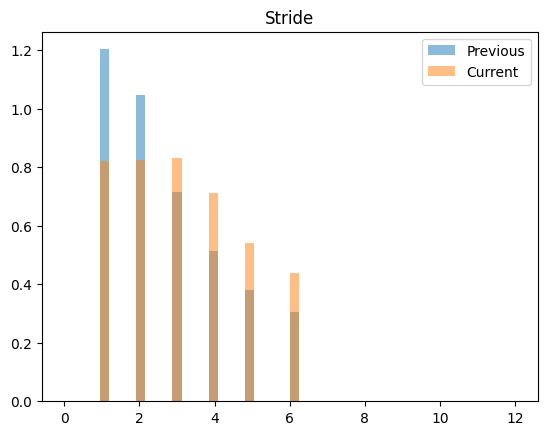

In [60]:
# 假设 info_dict_prev 和 info_dict 是两个包含 'length' 键的字典
data1 = np.array(info_dict_prev['stride'])
data2 = np.array(info_dict['stride'])

# 在同一个图中绘制两个直方图
plt.hist(data1, bins=50, density=True, range=(0, 12), alpha=0.5, label='Previous')
plt.hist(data2, bins=50, density=True, range=(0, 12), alpha=0.5, label='Current')

# 添加图例
plt.legend()
plt.title("Stride")
# 显示图形
plt.show()

In [39]:
combined_dict['/home/guangyi.liu/shared-folder/datasets/guangyi_data/scripts/panda70m/panda70m_part1/02643_gpt_captions_v4.json']


{'0264336_00002.mp4': {'aes_score': 5.03515625,
  'caption': 'There are three women sitting on a white couch in a dimly lit room.',
  'cut_num': [18.976847141472867,
   9.520435813062296,
   2.9736926679586566,
   1.5438610006467077],
  'fps': 30.0,
  'ofm': 3.68359375,
  'stride': 1,
  'split_num': 3,
  'gpt_caption': ['Two women are seated on a pink sofa in a room with a greenish ambient lighting. The woman on the left, wearing a golden dress and holding a glass of wine, is actively gesturing with her right hand while speaking. The woman on the right, dressed in a white blouse and necklace, listens attentively, maintaining a neutral expression. There is a third person, partially visible, facing them, wearing a plaid shirt. The background shows a blurred bookshelf.',
   'The camera angle remains constant, focusing on the two women. The woman in the golden dress continues her animated conversation, now using both hands to gesture. Her expressions are lively, indicating an engaging stor

In [64]:
import os
import json
from tqdm import tqdm
# Define the base directory where the json files are located
base_dir = "/home/guangyi.liu/shared-folder/datasets/guangyi_data/scripts/panda70m/"

# Initialize a dictionary to hold the combined data
combined_dict_prev = {}

# Function to recursively search for all files ending with 'captions.json' in a directory
def find_and_combine_json_files(directory):
    # Iterate through each item in the directory
    for item in tqdm(os.listdir(directory), ncols=90):
        item_path = os.path.join(directory, item)
        # Check if the item is a directory, if so, recursively search within it
        if os.path.isdir(item_path):
            find_and_combine_json_files(item_path)
        elif item_path.endswith('gemini_captions_v4_debug.json'):
            # Found a json file, read and combine its content
            with open(item_path, 'r') as json_file:
                # Initialize an empty dictionary for this file
                file_dict = {}
                for line in json_file:
                    # Each line is a separate dict; merge it into file_dict
                    line_dict = json.loads(line)
                    file_dict.update(line_dict)
                # Add the combined dictionary of this file to the main dictionary
                combined_dict_prev[item_path] = file_dict

# Start the process
find_and_combine_json_files(base_dir)
total_length = sum(len(value) for value in combined_dict_prev.values())

print(total_length)


100%|██████████████████████████████████████████████████| 98/98 [00:00<00:00, 55329.36it/s]

100%|██████████████████████████████████████████████| 6158/6158 [00:00<00:00, 67257.40it/s]

100%|████████████████████████████████████████████| 12422/12422 [00:00<00:00, 69084.11it/s]

100%|████████████████████████████████████████████| 14011/14011 [00:00<00:00, 69059.51it/s]

100%|████████████████████████████████████████████| 12554/12554 [00:00<00:00, 70831.32it/s]

100%|█████████████████████████████████████████████████████| 18/18 [00:02<00:00,  6.41it/s]

50332


In [65]:
len(combined_dict_prev)

1185

In [69]:
prev_test = combined_dict_prev['/home/guangyi.liu/shared-folder/datasets/guangyi_data/scripts/panda70m/panda70m_part1/00542_gemini_captions_v4_debug.json']

In [70]:
cur_test =combined_dict['/home/guangyi.liu/shared-folder/datasets/guangyi_data/scripts/panda70m/panda70m_part1/00542_gpt_captions_v4.json']

In [71]:
for key in prev_test.keys():
    if key in cur_test:
        print(key)

0054274_00000.mp4
0054239_00010.mp4
0054239_00036.mp4
0054280_00002.mp4
0054250_00008.mp4
0054251_00011.mp4
0054280_00026.mp4
0054230_00006.mp4
0054270_00011.mp4
0054256_00012.mp4
0054239_00017.mp4
0054239_00002.mp4
0054239_00011.mp4
0054275_00002.mp4
0054235_00019.mp4
0054280_00025.mp4
0054239_00039.mp4
0054239_00061.mp4
0054280_00014.mp4
0054280_00021.mp4
0054280_00012.mp4
0054280_00052.mp4
0054230_00011.mp4
0054280_00038.mp4
0054239_00035.mp4
0054280_00001.mp4
0054296_00003.mp4
0054267_00004.mp4
0054280_00015.mp4
0054239_00043.mp4
0054280_00006.mp4
0054256_00014.mp4
0054270_00022.mp4
0054205_00015.mp4
0054280_00016.mp4
0054239_00055.mp4
0054280_00020.mp4
0054280_00044.mp4
0054239_00019.mp4
0054277_00029.mp4
0054280_00007.mp4
0054239_00054.mp4
0054280_00008.mp4
0054280_00009.mp4
0054214_00008.mp4
0054280_00023.mp4
0054239_00042.mp4
0054280_00024.mp4
0054265_00005.mp4


In [76]:
prev_test['0054239_00010.mp4']

{'aes_score': 5.1640625,
 'caption': 'A person is using a blue spoon to eat a bowl of soup with noodles.',
 'cut_num': [15.708807331166486,
  5.606932467373124,
  4.889959710184182,
  2.1798249908294434],
 'fps': 9.9921875,
 'ofm': 2.65625,
 'stride': 3,
 'split_num': 1,
 'gpt_caption': ['The person uses a spoon to stir the noodles in a bowl of soup. The person then picks up a pair of chopsticks and uses them to eat the noodles. There are no new objects or camera movements in the frame.']}

In [77]:
cur_test['0054239_00010.mp4']

{'aes_score': 5.1640625,
 'caption': 'A person is using a blue spoon to eat a bowl of soup with noodles.',
 'cut_num': [15.708807331166486,
  5.606932467373124,
  4.889959710184182,
  2.1798249908294434],
 'fps': 9.9921875,
 'ofm': 2.65625,
 'stride': 3,
 'split_num': 1,
 'gpt_caption': ["A bowl of noodle soup is shown with a person using a blue plastic spoon to stir the noodles and broth. In subsequent frames, a pair of black chopsticks enters the scene, held by the same person or another, and begins to pick up food from the bowl. The chopsticks interact with the noodles and other ingredients, such as meatballs and greens, submerged in the soup. The camera remains focused on the bowl throughout, capturing the detailed textures of the soup's components and the utensils' movements. No significant camera movements or shifts in perspective are observed, maintaining a steady focus on the eating process."]}